In [2]:
!pip install -U scikit-learn
!pip install pandas
!pip install tenserflow
!pip install seaborn
!pip install dtaidistance
!pip install keras_multi_head
!pip install keras-mdn-layer
!pip install keras-tcn
!pip install tensorflow-probability
!pip install statsmodels
!pip install PyWavelets
!pip install --upgrade tsmoothie

!pip install matplotlib==3.7.0
!pip install xgboost

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/59/ed/548f6f686845d386a727a51a3daa411d95fc599649a2d54705f6773ac259/scikit_learn-1.3.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/3a/98/3041681b3a0fef0f59033861a05d846aa1d284b07b531ce35b1b97cc2e93/scipy-1.11.3-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 445.2 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 460.2 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.wh

ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.3 from https://files.pythonhosted.org/packages/7a/94/a1615bac6706eb8a58fe08675b80a11b5463ef9591176dd3e57257495774/matplotlib-3.8.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/55/14/0dc1884e3c04f9b073a47283f5d424926644250891db392a07c56f05e5c5/contourpy-1.1.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/08/65/8c3c09f2fa948b0a4dabecccb5edaa1d97f0d564f0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.4.2 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.10.1 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.


     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 262.6 kB/s eta 0:00:35
     ---------------------------------------- 0.1/9.2 MB 365.7 kB/s eta 0:00:26
     ---------------------------------------- 0.1/9.2 MB 547.6 kB/s eta 0:00:17
     - -------------------------------------- 0.3/9.2 MB 1.1 MB/s eta 0:00:08
     - -------------------------------------- 0.5/9.2 MB 1.8 MB/s eta 0:00:05
     --- ------------------------------------ 0.7/9.2 MB 2.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.0/9.2 MB 3.0 MB/s eta 0:00:03
     ----- ---------------------------------- 1.3/9.2 MB 3.2 MB/s eta 0:00:03
     ------ --------------------------------- 1.5/9.2 MB 3.5 MB/s eta 0:00:03
     -------- ------------------------------- 1.9/9.2 MB 4.0 MB/s eta 0:00:02
 

In [7]:
from modules.deep_learning_models import *
from modules.metrics import *
from modules.ml_models import *
from modules.plots import *
from modules.time_series_function import *


In [11]:
df=pd.read_csv("data/DrahiX_SIRTA_allzones_20160715_20210520_1h.csv")

# from google.colab import drive 
# drive.mount('/content/gdrive')  
# df = pd.read_csv('gdrive/My Drive/Colab Notebooks/DrahiX_SIRTA_allzones_20160715_20210520_1h.csv', sep=',')

df.rename(columns={"Date and time (UTC)": "Datetime"},inplace=True)
df['Datetime']=pd.to_datetime(df['Datetime'])
df=df.set_index("Datetime")
# df.rename(columns={"T1": "T"},inplace=True)
df.fillna(value=None, method='ffill', axis=None, limit=None, downcast=None,inplace=True)
df=df.drop(['Global_Solar_Flux','Direct_Solar_Flux','Diffuse_Solar_Flux'], axis=1)

df

,AirTemp,TGBT,T1,T2,T3,T4,T5,T6,T7
Datetime,,,,,,,,,
2016-07-15 00:00:00+00:00,12.41,9.37,0.99,2.12,0.19,1.50,1.41,0.26,2.64
2016-07-15 01:00:00+00:00,12.12,9.78,0.99,2.17,0.17,1.69,1.57,0.54,2.36
2016-07-15 02:00:00+00:00,11.54,10.95,1.13,2.31,0.34,1.66,1.68,0.33,3.18
2016-07-15 03:00:00+00:00,11.28,13.73,1.31,2.40,0.89,1.64,1.78,0.54,4.81
2016-07-15 04:00:00+00:00,10.77,14.24,1.17,2.29,0.27,2.10,2.10,0.76,5.25
...,...,...,...,...,...,...,...,...,...
2021-05-19 20:00:00+00:00,10.93,15.04,5.31,1.65,2.37,0.51,1.54,0.94,2.22
2021-05-19 21:00:00+00:00,10.10,11.11,2.06,1.02,2.29,0.50,1.50,0.94,2.34
2021-05-19 22:00:00+00:00,9.48,22.12,7.20,2.26,2.31,0.52,1.50,1.02,6.72


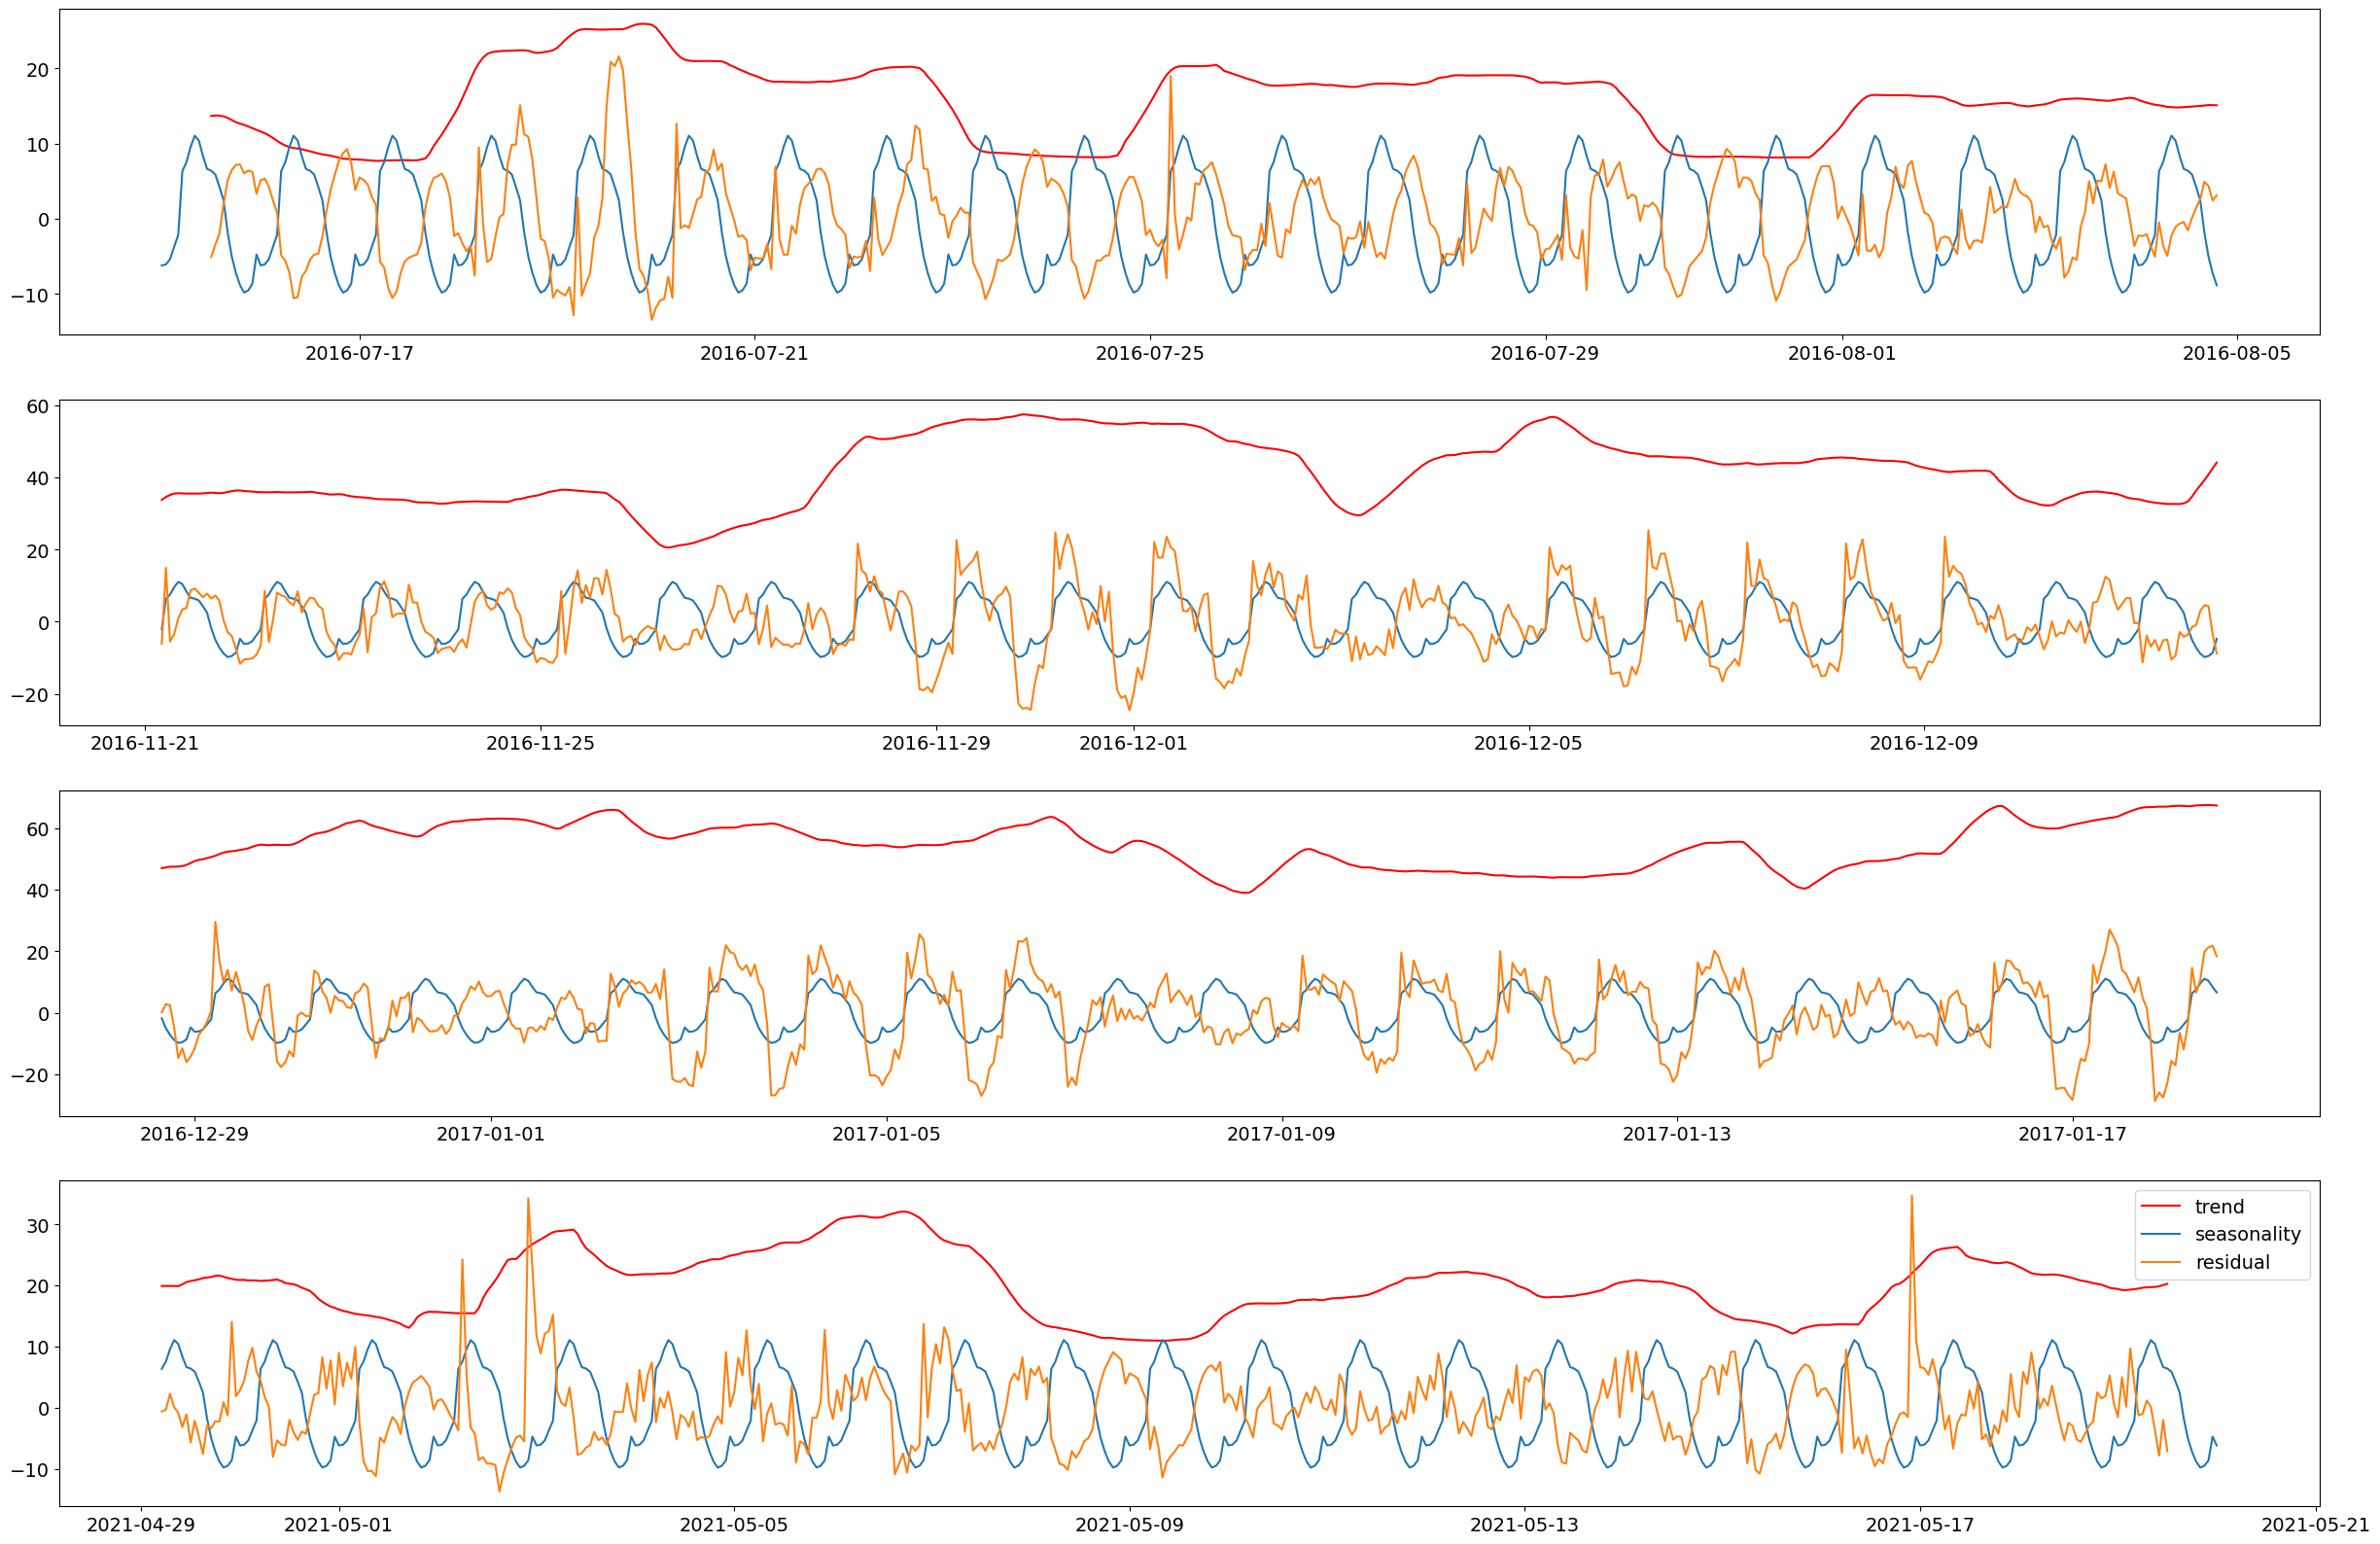

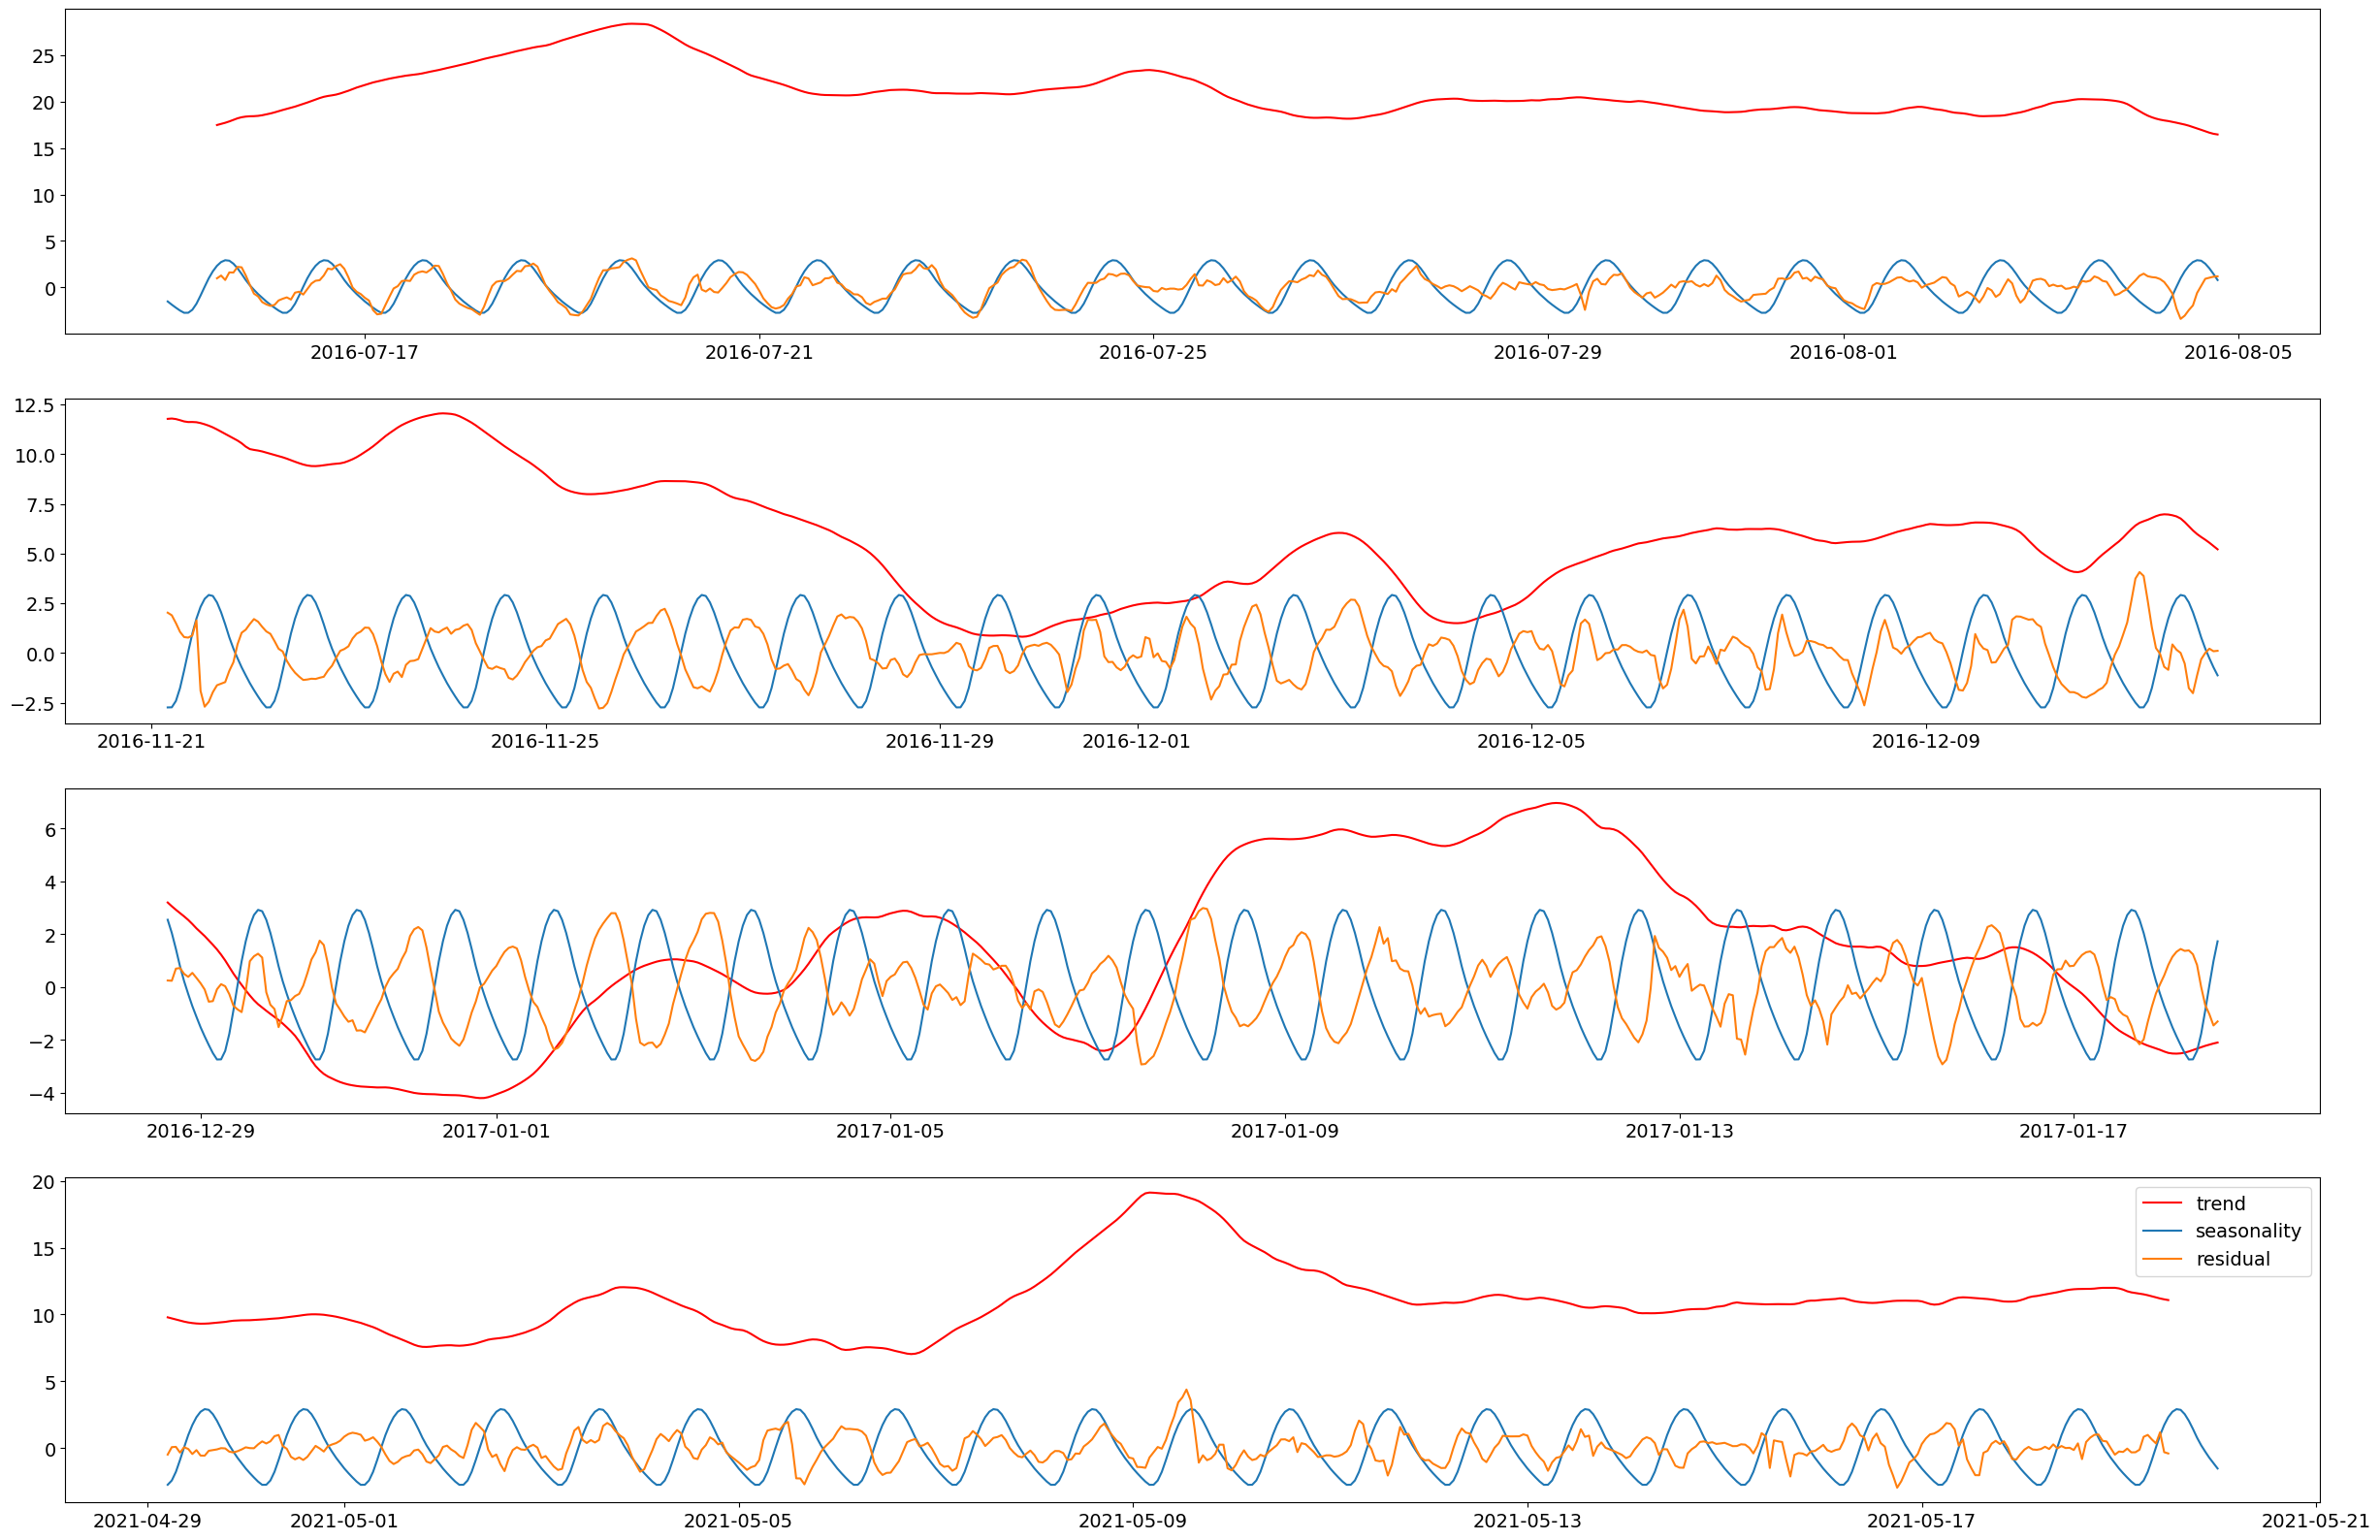

In [13]:
plot_saisonal_decomp(df['TGBT'])
plot_saisonal_decomp(df['AirTemp'])

# Apply filters / smoothing

# Create features

# Transform to univariate time series problem + split train / test

# Scale

# ML baseline

# Deep learning